# Assignment 2: Voting Visualized

## Deadline

Oct. 24th

## Important notes

- Make sure you push on GitHub your notebook with all the cells already evaluated.
- Note that maps do not render in a standard Github environment. You should export them to HTML and link them in your notebook.
- Don't forget to add a textual description of your thought process, the assumptions you made, and the solution you implemented.
- Please write all your comments in English, and use meaningful variable names in your code.
- Your repo should have a single notebook (plus the data files necessary) in the master branch. If there are multiple notebooks present, we will not grade anything. 

## Background


* Are you curious to know what the political leanings of the people of Switzerland are?
* Do you wake up in a cold sweat, wondering which party won the last cantonal parliament election in Vaud?
* Are you looking to learn all sorts of visualizations, including maps, in Python?

If your answer to any of the above is yes, this assignment is just right for you. Otherwise, it's still an assignment, so we're terribly sorry.

The chief aim of this assignment is to familiarize you with visualizations in Python, particularly maps, and also to give you some insight into how visualizations are to be interpreted. The data we will use is the data on Swiss cantonal parliament elections from 2007 to 2018, which contains, for each cantonal election in this time period, the voting percentages for each party and canton.

For the visualization part, install [Folium](Folium) (_Hint: it is not available in your standard Anaconda environment, therefore search on the Web how to install it easily!_). Folium's README comes with very clear examples, and links to their own iPython Notebooks -- make good use of this information. For your own convenience, in this same directory you can already find one TopoJSON file, containing the geo-coordinates of the cantonal borders of Switzerland.

One last, general reminder: back up any hypotheses and claims with data, since this is an important aspect of the course.

In [39]:
# Put your imports here.
import os
import pandas as pd
import numpy as np
import json
import folium
import branca.colormap as cm
import matplotlib.pyplot as plt

In [40]:
data_folder = './data/'

## Task 1: Cartography and census

__A)__ Display a Swiss map that has cantonal borders as well as the national borders. We provide a TopoJSON `data/ch-cantons.topojson.json` that contains the borders of the cantons.

__B)__ Take the spreadsheet `data/communes_pop.xls`, collected from [admin.ch](https://www.bfs.admin.ch/bfs/fr/home/statistiques/catalogues-banques-donnees/tableaux.assetdetail.5886191.html), containing population figures for every commune. You can use [pd.read_excel()](https://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.read_excel.html) to read the file and to select specific sheets. Plot a histogram of the population counts and explain your observations. Do not use a log-scale plot for now. What does this histogram tell you about urban and rural communes in Switzerland? Are there any clear outliers on either side, and if so, which communes?

__C)__ The figure below represents 4 types of histogram. At this stage, our distribution should look like Fig.(a). A common way to represent [power-laws](https://en.wikipedia.org/wiki/Power_law) is to use a histogram using a log-log scale  -- remember: the x-axis of an histogram is segmented in bins of equal sizes and y-values are the average of each bin. As shown in Fig.(b), small bins sizes might introduce artifacts. Fig.(b) and Fig.(c) are examples of histograms with two different bin sizes. Another great way to visualize such distribution is to use a cumulative representation, as show in Fig.(d), in which the y-axis represents the number of data points with values greater than y.  
  
Create the figures (b) and (d) using the data extracted for task 1B. For Fig.(b), represent two histograms using two different bin sizes and provide a brief description of the results. What does this tell you about the relationship between the two variables, namely the frequency of each bin and the value (i.e. population in case of the communal data) for each bin?

<img src="plaw_crop.png" style="width: 600px;">
  
The figure is extracted from [this paper](https://arxiv.org/pdf/cond-mat/0412004.pdf) that contains more information about this family of distributions.

In [21]:
#Q1.A

#simple map of Switzerland
m_ch = folium.Map([46.7,8.2], zoom_start =7)

#we load the data to draw cantons
state_geo_path = data_folder + 'ch-cantons.topojson.json'
geo_data = json.load(open(state_geo_path))

#we draw the cantons
m_ch.choropleth(geo_data, fill_color = 'blue', fill_opacity = 0.2, topojson='objects.cantons')

m_ch.save('Swiss_card_boarders.html')
m_ch

In [10]:
#if in the first line, a string contains at least 2 digits it corresponds to a city

def hasTwoNumbers(inputString):
    sum =0
    if (isinstance(inputString, str)):
        for char in inputString:
               if (char.isdigit()==True):
                    sum=sum+1
    return (sum>1)

def extractNumber(inputString):
    a = ""
    for char in inputString:
        if (char.isdigit() ==True) and (char !=0):
            a = a + char
    return (int(a))

def extractNames(inputString):
    a = ""
    for char in inputString:
        if (char.isdigit() ==False) and (char !="."):
            a = a + char
    return (deleteUselessSpaces(a))

def deleteUselessSpaces(inputString):
    a=""
    char_before="1"
    for char in inputString:
        if (char ==" ") and (a==""):
            a = a
        elif (char_before == " ") and (char == " "):
            a = a
        else:
            a = a + char
        char_before = char
    return (a)

In [11]:
#Q1.B
data_path = data_folder + 'communes_pop.xls'

#We want to create a histogram of the distribution of the number of inhibants in swiss communes

#We will focus on the most recent data, that means for year 2017

#In order to extract the data from the original file, we will create a new df, with only the data for the communes
#In order to separate the number allocated to a commune from its name, we created little functions that are in the cell below

cities_id= []
cities_name= []
nb_inhabitants=[]

year = 2017

df_data = pd.read_excel(data_path, str(year))
nb_lines = len(df_data.iloc[:,0])
        
for i in range (0, nb_lines):
    if (hasTwoNumbers(df_data.iloc[i,0]) == True) and (isinstance(df_data.iloc[i,1], int)==True):
            cities_id.append(extractNumber(df_data.iloc[i,0]))
            nb_inhabitants.append(df_data.iloc[i,1])
            cities_name.append(extractNames(df_data.iloc[i,0]))

#Let's create a new df with cleaned data
df_2017= pd.DataFrame({ "City_id" : cities_id, "City_name" : cities_name, "Nb_Inh_2017" : nb_inhabitants })

#Let's order the value
df_2017 = df_2017.sort_values("Nb_Inh_2017", ascending=0)
df_2017

,City_id,City_name,Nb_Inh_2017
167,261,Zürich,402762
2158,6621,Genève,198979
929,2701,Basel,171017
1826,5586,Lausanne,137810
356,351,Bern,133115
153,230,Winterthur,109775
519,1061,Luzern,81592
1072,3203,St Gallen,75481
1614,5192,Lugano,63932
208,371,Biel/Bienne,54456


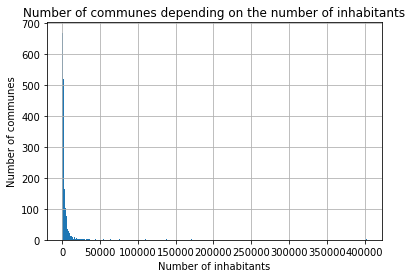

In [6]:
#Histogram of the distribution of swiss communes by number of inhabitants
df_2017_extract = df_2017[['Nb_Inh_2017','City_name']]
nb_bins = 500
df_2017_extract.hist(bins=nb_bins)

plt.title("Number of communes depending on the number of inhabitants")
plt.ylabel("Number of communes")
plt.xlabel("Number of inhabitants")

plt.show()

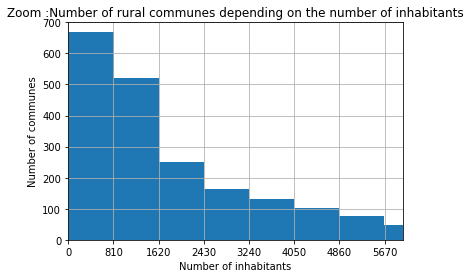

In [7]:
#Zoom on rural communes (less than 6000 inhabitants)
#df_2017_extract.hist(bins=nb_bins)
df_2017_extract.hist(bins=nb_bins)

plt.title("Zoom :Number of rural communes depending on the number of inhabitants")
plt.ylabel("Number of communes")
plt.xlabel("Number of inhabitants")

plt.xticks(range(0, 402762, int(405000/500)))

plt.axis([0,6000,0,700])

plt.show()

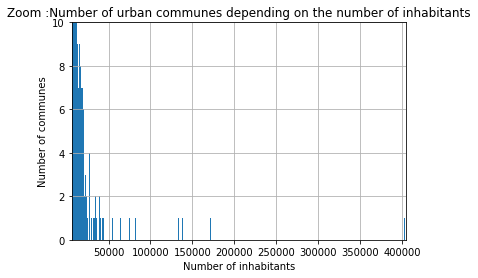

In [8]:
#Zoom on urban communes (more than 6000 inhabitants)

df_2017_extract.hist(bins=nb_bins)


plt.title("Zoom :Number of urban communes depending on the number of inhabitants")
plt.ylabel("Number of communes")
plt.xlabel("Number of inhabitants")

plt.axis([6000,405000,0,10])

plt.show()

We consider that a commune is urban if it has more than 6000 inhabitants and rural if it has less than 6000 inhabitants

According to the histograms we can see that there are more rural communes (1935) as urban communes (305) in Switzerland but more people live in urban communes (5 117 014) as in rural communes (3 302 536)

We consider as outliers the 1% communes in each categories that have extremes values of inhabitants, that means, the 0.5% smallest and 0.5% biggest communes in each category.

In [9]:
df_2017_urban_communes = df_2017[:305]

q_big_urban = df_2017_urban_communes["Nb_Inh_2017"].quantile(0.995)
q_small_urban = df_2017_urban_communes["Nb_Inh_2017"].quantile(0.005)

print("the 1% extreme big urban communes: ",df_2017_urban_communes[df_2017_urban_communes["Nb_Inh_2017"] > q_big_urban])

print("the 1% extreme small urban communes:",df_2017_urban_communes[df_2017_urban_communes["Nb_Inh_2017"] < q_small_urban])

the 1% extreme big urban communes:        City_id City_name  Nb_Inh_2017
167       261    Zürich       402762
2158     6621    Genève       198979
the 1% extreme small urban communes:      City_id     City_name  Nb_Inh_2017
979     2846  Gelterkinden         6013
466      944     Uetendorf         6006


In [10]:
df_2017_rural_communes = df_2017[305:]

q_big_rural = df_2017_rural_communes["Nb_Inh_2017"].quantile(0.995)
q_small_rural = df_2017_rural_communes["Nb_Inh_2017"].quantile(0.005)

print("the 1% extreme big rural communes: ",df_2017_rural_communes[df_2017_rural_communes["Nb_Inh_2017"] > q_big_rural])

print("the 1% extreme small rural communes:",df_2017_rural_communes[df_2017_rural_communes["Nb_Inh_2017"] < q_small_rural])

the 1% extreme big rural communes:        City_id       City_name  Nb_Inh_2017
652      1401         Alpnach         5997
678      1706       Oberägeri         5994
65         86       Dielsdorf         5992
1534     4471    Bischofszell         5947
2109     6412          Peseux         5926
325       412  Kirchberg (BE)         5909
1107     3291       Bad Ragaz         5874
2103     6404          Boudry         5846
1093     3236   St Margrethen         5841
1064     3101       Appenzell         5825
the 1% extreme small rural communes:       City_id    City_name  Nb_Inh_2017
407       661  Clavaleyres           49
1663     5315     Linescio           45
1254     3707    Lohn (GR)           44
295       972       Berken           43
202       715   Rebévelier           43
198       708     Schelten           37
894      2549  Kammersrohr           30
2040     6172       Bister           30
1575     5102      Corippo           14


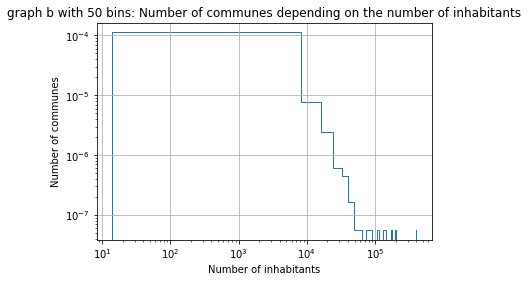

In [11]:
#Q1.C

df_2017_extract.hist(bins=50,density=1,histtype='step')

plt.title("graph b with 50 bins: Number of communes depending on the number of inhabitants")
plt.ylabel("Number of communes")
plt.xlabel("Number of inhabitants")

plt.xscale('log')
plt.yscale('log')

plt.show()

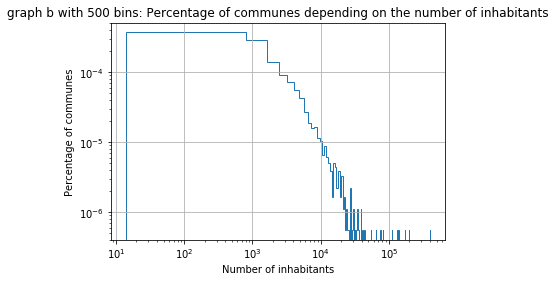

In [12]:
df_2017_extract.hist(bins=500,density=1,histtype='step')

plt.title("graph b with 500 bins: Percentage of communes depending on the number of inhabitants")
plt.ylabel("Percentage of communes")
plt.xlabel("Number of inhabitants")

plt.xscale('log')
plt.yscale('log')

plt.show()

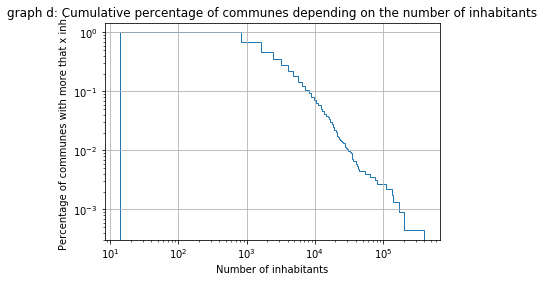

In [13]:
df_2017_extract.hist(bins=500,density=1,cumulative=-1,histtype='step')

plt.title("graph d: Cumulative percentage of communes depending on the number of inhabitants")
plt.ylabel("Percentage of communes with more that x inh.")
plt.xlabel("Number of inhabitants")

plt.xscale('log')
plt.yscale('log')

plt.show()

With the log-log histogram the representation of the data is clearer. The extreme ranges of values (number of inhabitants and high of the bins) become more readable.
In the log-log histogram, we see that the first bins are larger than the last one, that's due to the log scale, that makes big values nearer than small values, we also see, that changing the number of bins (from 50 to 500), don't change this perception.

The last graph allows to see that for example only 10% of communes are urban (more than 6000 inhabitants), but as we said before the urban communes contains 60 % of the population (5 117 014 / (3 302 536+ 5 117 014) =0.6).

## Task 2: Parties visualized

We provide a spreadsheet, `data/voters.xls`, (again) collected from [admin.ch](https://www.bfs.admin.ch/bfs/fr/home/statistiques/politique/elections/conseil-national/force-partis.assetdetail.217195.html), which contains the percentage of voters for each party and for each canton. For the following task, we will focus on the period 2014-2018 (the first page of the spreadsheet). Please report any assumptions you make regarding outliers, missing values, etc. Notice that data is missing for two cantons, namely Appenzell Ausserrhoden and Graubünden, and your visualisations should include data for every other canton.


__A)__ For the period 2014-2018 and for each canton, visualize, on the map, **the percentage of voters** in that canton who voted for the party [`UDC`](https://en.wikipedia.org/wiki/Swiss_People%27s_Party) (Union démocratique du centre). Does this party seem to be more popular in the German-speaking part, the French-speaking part, or the Italian-speaking part?

__B)__ For the same period, now visualize **the number of residents** in each canton who voted for UDC.

__C)__ Which one of the two visualizations above would be more informative in case of a national election with majority voting (i.e. when a party needs to have the largest number of citizens voting for it among all parties)? Which one is more informative for the cantonal parliament elections?

For part B, you can use the `data/national_council_elections.xslx` file ([guess where we got it from](https://www.bfs.admin.ch/bfs/fr/home/statistiques/politique/elections/conseil-national/participation.assetdetail.81625.html)) to have the voting-eligible population of each canton in 2015.

In [22]:
#Task 2.A

#We load the dataframe with with all the cantons and their ID
cantons = pd.read_csv(data_folder + 'cantons.csv')
df_cantons = pd.DataFrame(cantons)
#df_cantons

#create dataframe with voters file, for years 2014-2018 ('actuel')
voters_actuel = pd.read_excel(data_folder + 'voters.xls', sheet_name = 'actuel (2014-2018)')
df_voters_actuel = pd.DataFrame(voters_actuel)

#we delete the columns and rows with only NaN values, then reset the index
df_voters_actuel = df_voters_actuel.dropna(axis='columns', how='all', thresh=None, subset=None, inplace=False)
df_voters_actuel = df_voters_actuel.dropna(axis='index', how='all', thresh=None, subset=None, inplace=False)
df_voters_actuel = df_voters_actuel.reset_index(drop=True)

#we delete the end of the table (that is not about the cantons datas)
df_voters_actuel = df_voters_actuel.iloc[0:27]

#we rename the columns according to 1st row, then we delete it
df_voters_actuel.columns = df_voters_actuel.iloc[0]
df_voters_actuel.rename(columns={np.nan : 'Canton'}, inplace=True)
df_voters_actuel.drop(df_voters_actuel.index[0], inplace=True)

#df_voters_actuel

It is important to note that, the name of the canton sometimes appears to have a number at the end (e.g. Uri 1)) or a space for exemple.

In [23]:
#we create a dataframe that contains the original un-cleaned names of the cantons, 
#the 'real' names of the cantons and the corresponding code IDs

nb_lines = len(df_voters_actuel.iloc[:,0])
canton_name_original = []
canton_real_name = []
canton_ID = []
for i in range (0, nb_lines):
    canton_name_original.append(df_voters_actuel.iloc[i,0])
    canton_real_name.append(df_cantons.iloc[i,1])
    canton_ID.append(df_cantons.iloc[i,0])
    
df_ID_cantons = pd.DataFrame({'Canton': canton_name_original , 'Canton of': canton_real_name, 'ID': canton_ID})

#df_ID_cantons

In [24]:
#We merge the two previous dataframe, so we have all our datas linked to the canton ID 
actual_voters_cantons = pd.merge(df_ID_cantons, df_voters_actuel, on = 'Canton')
#actual_voters_cantons

In [25]:
#New dataframe with only the columns that are needed
UDC_cantons = actual_voters_cantons[['Canton of', 'ID', 'UDC']]

#We set the nan values to 0
nb_lines = len(UDC_cantons.iloc[:,0])
for i in range (0, nb_lines):
    if np.isnan(UDC_cantons.iloc[i,2]):
        UDC_cantons.iloc[i, 2] = 0

UDC_cantons

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Canton of,ID,UDC
0,Zürich,ZH,30.0232
1,Bern,BE,26.7609
2,Luzern,LU,24.1156
3,Uri,UR,24.0532
4,Schwyz,SZ,33.1151
5,Obwalden,OW,24.5323
6,Nidwalden,NW,25.9166
7,Glarus,GL,25.2754
8,Zug,ZG,23.6318
9,Fribourg,FR,19.7176


In [26]:
#Create a linear color bar
linear1 = cm.linear.BuGn_09.scale(0,36)

UDC = UDC_cantons.set_index('ID')['UDC']

In [27]:
#Create a function that give a color in function of the value
def my_color_function1(feature):
    #The two cantons that have missed values get no color
    if UDC[feature['id']] == 0:
        return 'None'
    else:
        #The other cantons receive a value dependant of the color bar
        return linear1(UDC[feature['id']])

In [28]:
#Create the style of the map like the border of each cantons and the color of the cantons
def style_function1(feature):
    return {
        'fillOpacity': 0.6,
        'color': 'black',
        'weight': 1,
        'fillColor': my_color_function1(feature)
    }

In [31]:
#Open the TopoJson file
state_geo_path = 'data/ch-cantons.topojson.json'
geo_json_data = json.load(open(state_geo_path))
#Generate the map focuses on Switzerland
swiss_coord = [46.8, 8.2]
m = folium.Map(swiss_coord, zoom_start = 7)
#Add the color of the Switzerland map
folium.TopoJson(geo_json_data, object_path = 'objects.cantons',
                style_function=style_function1).add_to(m)

#Add th color bar inside the map
linear1.caption = 'Percentage of voters for UDC'
m.add_child(linear1)

m.save('Percentage_of_voters_for_UDC.html')


The party seem to be more popular in the German-speaking part of the Switzerland especielly in the east German-speaking part. On the other hand, in the Italian-speking part (Ticino), the UDC party seem to be unpopular. 

In [22]:
#Question B
#open of the file that contain the population of each cantons and villages
population = pd.read_excel(data_folder + 'national_council_elections.xlsx', sheet_name = '2015')
df_population = pd.DataFrame(population)
#df_population

In [23]:
nb_habitants = []
cantons = []

#Cleaning of the data, only the lines with the cantons are interesting
for i in range (8, 34):
    cantons.append(df_population.iloc[i,0])
    nb_habitants.append(df_population.iloc[i,2])

In [24]:
#Create a DataFrame with the canton name and the population
df_pop_cantons = pd.DataFrame({'Canton' : cantons, 'Nombre electeurs votes' : nb_habitants})
#df_pop_cantons

In [25]:
#we create a dataframe that contains the original un-cleaned names of the cantons, 
#the 'real' names of the cantons and the corresponding code IDs

canton_old_name = []

for j in range(0, 26):
    canton_old_name.append(df_pop_cantons.iloc[j,0])
    
canton_name = pd.DataFrame({'Canton': canton_old_name, 'Canton of': canton_real_name, 'ID': canton_ID})

#Merge with the DataFrame that contain the percent of vote for UDC and the participation
actual_pop = pd.merge(canton_name, df_pop_cantons, on = 'Canton')
actual_pop_voters = pd.merge(UDC_cantons, actual_pop, on = 'Canton of')

actual_pop_voters.rename(columns={'ID_x' : 'ID'}, inplace=True)

#actual_pop
#actual_pop_voters

In [26]:
#Create a new column with the total number of vote for UDC for each cantons
actual_pop_voters['Votes UDC'] = (actual_pop_voters['Nombre electeurs votes']*actual_pop_voters['UDC'])/100
#actual_pop_voters

In [28]:
UDC_pop = actual_pop_voters.set_index('ID')['Votes UDC']

#Create a linear color bar
linear2 = cm.linear.BuGn_09.scale(2500, 130000)

In [29]:
#Create a function that give a color in function of the value
def my_color_function2(feature):
    #The two cantons that have missed values get no color
    if UDC_pop[feature['id']] == 0:
        return 'None'
    else:
        #The other cantons receive a value dependant of the color bar
        return linear2(UDC_pop[feature['id']])

In [30]:
#Create the style of the map like the border of each cantons and the color of the cantons
def style_function2(feature):
    return {
        'fillOpacity': 0.6,
        'color': 'black',
        'weight': 1,
        'fillColor': my_color_function2(feature)
    }

In [31]:
#Generate the map focuses on Switzerland
m = folium.Map(swiss_coord, zoom_start = 7)
#Add the color of the Switzerland map
folium.TopoJson(geo_json_data, object_path = 'objects.cantons', style_function = style_function2).add_to(m)
#Add th color bar inside the map
linear2.caption = 'Number of residents who voted for UDC'
m.add_child(linear2)

C) For national election, the last visualization is the most important because it show the absolute number of people that can vote for the party UDC. For instance, the canton of Zurich is very important for the party UDC. On the other hand, for the cantonal parliement election, the first one is the most informative. Indeed, each canton is equally important no matter the number of residents that live in. 

## Task 3: More socialism or more nationalism?

In this section, we focus on two parties that are representative of the left and the right on the Swiss political spectrum. You will propose a way to visualize their influence over time and for each canton.

__A)__ Take the two parties [`UDC`](https://en.wikipedia.org/wiki/Swiss_People%27s_Party) (Union démocratique du centre) and [`PS`](https://en.wikipedia.org/wiki/Social_Democratic_Party_of_Switzerland) (Parti socialiste suisse). For each canton, we define 'right lean' in a certain period as follows:

$$\frac{VoteShare_{UDC} - VoteShare_{PS}}{VoteShare_{UDC} + VoteShare_{PS}}$$  

Visualize the right lean of each canton on the map. What conclusions can you draw this time? Can you observe the [röstigraben](https://en.wikipedia.org/wiki/R%C3%B6stigraben) ?

__B)__ For each party, devise a way to visualize the difference between its 2014-2018 vote share (i.e. percentage) and its 2010-2013 vote share for each canton. Propose a way to visualize this evolution of the party over time, and justify your choices. There's no single correct answer, but you must reasonably explain your choices.

--> For this Task we use again the dataframe actuel_voters_cantons created in the task 2.

It was a merge of two dataframes: the one with voters file, for years 2014-2018 ('actuel'); and the one that contains the real names of the Cantons.

In [41]:
#New dataframe with only the columns that are needed
final_voters_actuel = actual_voters_cantons[['Canton of', 'ID', 'UDC', 'PS']]

final_voters_actuel

,Canton of,ID,UDC,PS
0,Zürich,ZH,30.0232,19.7164
1,Bern,BE,26.7609,22.3288
2,Luzern,LU,24.1156,11.8489
3,Uri,UR,24.0532,12.985
4,Schwyz,SZ,33.1151,12.9254
5,Obwalden,OW,24.5323,15.0909
6,Nidwalden,NW,25.9166,4.47005
7,Glarus,GL,25.2754,12.7504
8,Zug,ZG,23.6318,9.25091
9,Fribourg,FR,19.7176,23.5843


In [42]:
# Question 3.A:

#We calculate the right lean
#We set the NaN values to 2 (a value out of the right lean range (-1, 1))

nb_lines = len(final_voters_actuel.iloc[:,0])
right_lean = []

for i in range (0, nb_lines):
    Vote_share_UDC = final_voters_actuel.iloc[i,2]
    Vote_share_PS = final_voters_actuel.iloc[i,3]
    if np.isnan(Vote_share_UDC) or np.isnan(Vote_share_PS):
        right_lean.append(2)
    else:
        right_lean.append((Vote_share_UDC - Vote_share_PS)/(Vote_share_UDC + Vote_share_PS))

#right_lean

In [43]:
# New dataframe with the right lean
df_right_lean_cantons = pd.DataFrame({'ID': canton_ID, 'Canton of': canton_real_name, 'Right Lean': right_lean})

df_right_lean_cantons

,ID,Canton of,Right Lean
0,ZH,Zürich,0.207214
1,BE,Bern,0.090286
2,LU,Luzern,0.341078
3,UR,Uri,0.298833
4,SZ,Schwyz,0.438521
5,OW,Obwalden,0.238281
6,NW,Nidwalden,0.705789
7,GL,Glarus,0.329381
8,ZG,Zug,0.437339
9,FR,Fribourg,-0.089296


In [44]:
df_right_lean = df_right_lean_cantons.set_index('ID')['Right Lean']

linear = cm.linear.BrBG_07.to_step(20).scale(-1,1)

def my_color_function(feature):
    #We map missing values in grey
    if df_right_lean[feature['id']] == 2:
        return '#d9d9d9'  
    else:
        return linear(df_right_lean[feature['id']])

    
cantons_geo_path = 'data/ch-cantons.topojson.json'
geo_json_data = json.load(open(cantons_geo_path))
swiss_coord = [47, 8.2]
map_right_lean = folium.Map([47, 8.2],zoom_start = 7)


def style_function(feature):
    return {
        'fillOpacity': 0.7,
        'color': 'black',
        'weight': 0.7,
        'fillColor': my_color_function(feature)
    }


folium.TopoJson(geo_json_data, object_path = 'objects.cantons',
                style_function=style_function).add_to(map_right_lean)

linear.caption = 'Right Lean : from 100% left (brown) to 100% right (green)'

map_right_lean.add_child(linear)

map_right_lean.save('map_right_lean.html')

We observe that the right lean is mostly positive in the German-speaking part of Switzerland and mostly negative for the French-speaking part. For the Cantons that speak both languages, the right lean is usually around 0 (exepted for Valais, that remains positive). Thus, we do observe the röstigraben.

Ticino is the canton with the more negative right lean, and is surrounded by German-speaking Cantons with postive right lean. Thus we do also observe the Polentagraben.

Nidwald is the canton with the highest right lean value.

For this map we chose to use diverging colors as it was easier to see the cantons that are mostly 'left-voters' (negative value, in brown), mostly 'right-voters' (positive value, in green), or 50-50 (around 0, white).

In [45]:
#create dataframe with voters file, for years 2010-2013 ('before')
voters_before = pd.read_excel(data_folder + 'voters.xls', sheet_name = '2010-2013')
df_voters_before = pd.DataFrame(voters_before)

#we delete the columns and rows with only NaN values, then reset the index
df_voters_before = df_voters_before.dropna(axis='columns', how='all', thresh=None, subset=None, inplace=False)
df_voters_before = df_voters_before.dropna(axis='index', how='all', thresh=None, subset=None, inplace=False)
df_voters_before = df_voters_before.reset_index(drop=True)

#we delete the end of the table (that is not about the cantons datas)
df_voters_before = df_voters_before.iloc[0:27]

#we only keep the columns with valid datas for at least 2 the cantons
df_voters_before = df_voters_before.dropna(axis='columns', how='all', thresh=3, subset=None, inplace=False)

#we rename the columns according to 1st row, then we delete it
df_voters_before.columns = df_voters_before.iloc[0]
df_voters_before.rename(columns={np.nan : 'Canton'}, inplace=True)
df_voters_before.drop(df_voters_before.index[0], inplace=True)

#df_voters_before

In [46]:
#we create a dataframe that contains the original un-cleaned names of the cantons, 
#the 'real' names of the cantons and the corresponding code IDs

nb_lines = len(df_voters_before.iloc[:,0])
canton_name_original_before = []

for i in range (0, nb_lines):
    canton_name_original_before.append(df_voters_before.iloc[i,0])
    
df_ID_cantons_before = pd.DataFrame({'Canton': canton_name_original_before , 'Canton of': canton_real_name, 'ID': canton_ID})

#df_ID_cantons_before

In [47]:
#We merge the the 2 previous dataframes
before_voters_cantons = pd.merge(df_ID_cantons_before, df_voters_before, on = 'Canton')
#before_voters_cantons

In [48]:
#New dataframe with only what is needed
final_voters_before = before_voters_cantons[['Canton of', 'ID', 'UDC', 'PS']]
final_voters_before

,Canton of,ID,UDC,PS
0,Zürich,ZH,29.6356,19.3172
1,Bern,BE,26.6216,18.8528
2,Luzern,LU,22.1265,10.9642
3,Uri,UR,24.6299,12.0853
4,Schwyz,SZ,34.0045,12.3812
5,Obwalden,OW,21.1222,10.9218
6,Nidwalden,NW,26.614,2.09023
7,Glarus,GL,26.329,13.9205
8,Zug,ZG,22.7253,10.2641
9,Fribourg,FR,18.5935,24.2525


In [49]:
#We create a dataframe with both the datas for years 2014-2018 and 2010-2013 
#(x = actual, y = before)

df_compare = pd.merge(final_voters_actuel, final_voters_before, on = 'ID')

#df_compare

In [50]:
# Question 3.B:

#We calculate the difference between the 2014-2018 and 2010-2013 UDC vote share 
#We set the NaN values to 200 (a value out of the vote percentage range (0, 100))

nb_lines = len(df_compare.iloc[:,0])
diff_UDC = []

for i in range (0, nb_lines):
    UDC_actuel = df_compare.iloc[i,2]
    UDC_before = df_compare.iloc[i,5]
    if np.isnan(UDC_actuel) or np.isnan(UDC_before):
        diff_UDC.append(200)
    else:
        diff_UDC.append(UDC_actuel-UDC_before)
    
#same thing for PS

diff_PS = []

for i in range (0, nb_lines):
    PS_actuel = df_compare.iloc[i,3]
    PS_before = df_compare.iloc[i,6]
    if np.isnan(PS_actuel) or np.isnan(PS_before):
        diff_PS.append(200)
    else:
        diff_PS.append(PS_actuel-PS_before)   

#diff_UDC
#diff_PS

In [51]:
# New dataframe with the differences
df_differences = pd.DataFrame({'ID': canton_ID, 'Canton of': canton_real_name, 'UDC : augmentation of vote percentage between 2010-2013 and 2014-2018': diff_UDC, 'PS : augmentation of vote percentage between 2010-2013 and 2014-2018': diff_PS})
df_differences

,ID,Canton of,UDC : augmentation of vote percentage between 2010-2013 and 2014-2018,PS : augmentation of vote percentage between 2010-2013 and 2014-2018
0,ZH,Zürich,0.387663,0.399261
1,BE,Bern,0.139293,3.475942
2,LU,Luzern,1.989138,0.884687
3,UR,Uri,-0.576676,0.899648
4,SZ,Schwyz,-0.889433,0.544203
5,OW,Obwalden,3.410147,4.169110
6,NW,Nidwalden,-0.697402,2.379824
7,GL,Glarus,-1.053610,-1.170117
8,ZG,Zug,0.906521,-1.013202
9,FR,Fribourg,1.124138,-0.668150


In [52]:
df_differences_UDC = df_differences.set_index('ID')['UDC : augmentation of vote percentage between 2010-2013 and 2014-2018']

linear = cm.linear.RdBu_07.to_step(12).scale(-6,6)

def my_color_function(feature):
    #Map NaN values in grey
    if df_differences_UDC[feature['id']] == 200:
        return '#d9d9d9'  
    else:
        return linear(df_differences_UDC[feature['id']])

state_geo_path = 'data/ch-cantons.topojson.json'
geo_json_data = json.load(open(state_geo_path))
swiss_coord = [47, 8.2]
map_UDC = folium.Map([47, 8.2],zoom_start = 7)

def style_function(feature):
    return {
        'fillOpacity': 0.6,
        'color': 'black',
        'weight': 0.7,
        'fillColor': my_color_function(feature)
    }


folium.TopoJson(geo_json_data, object_path = 'objects.cantons',
                style_function=style_function).add_to(map_UDC)

linear.caption = 'UDC : augmentation of vote percentage between 2010-2013 and 2014-2018'

map_UDC.add_child(linear)

In [53]:
map_UDC.save('map_UDC.html')

In [ ]:
http://localhost:8890/view/Documents/Cours/ADAE/Git/H2/map_UDC.html

In [64]:
#We map our results

df_differences_PS = df_differences.set_index('ID')['PS : augmentation of vote percentage between 2010-2013 and 2014-2018']

linear = cm.linear.RdBu_07.to_step(12).scale(-6,6)

def my_color_function(feature):
    #Maps missing values in grey
    if df_differences_PS[feature['id']] == 200:
        return '#d9d9d9'  
    else:
        return linear(df_differences_PS[feature['id']])

    
state_geo_path = 'data/ch-cantons.topojson.json'
geo_json_data = json.load(open(state_geo_path))
swiss_coord = [47, 8.2]
map_PS = folium.Map([47, 8.2],zoom_start = 7)


def style_function(feature):
    return {
        'fillOpacity': 0.6,
        'color': 'black',
        'weight': 0.7,
        'fillColor': my_color_function(feature)
    }


folium.TopoJson(geo_json_data, object_path = 'objects.cantons',
                style_function=style_function).add_to(map_PS)

linear.caption = 'PS : augmentation of vote percentage between 2010-2013 and 2014-2018'
#Red (negative): decrease in vote share; and Blue (positive): increase in vote share

map_PS.add_child(linear)

To visualize the evolution of the party over time, we chose to draw for each party a map of switzerland that displays the difference of percentage between the two periods (2010-2013 and 2014-2018) for each Canton. A positive difference means an increase of vote share between 2010-2013 and 2014-2018 and a negative difference means a decrease in vote share.
Thus we can easily see if each party is becoming more or less popular in each Canton.

We chose a diverging range of color, so we could easily spot if each party is becoming more popular (blue), less popular (red), or remaining stable (~white) for each Canton, over the years.

If a bar diagram could have shown the differences, but also the actual vote shares, it would have been harder to find each Canton quickly, as the 26 Cantons would have been listed below the graph and not shown in a geographical way.

Furthermore, as the differences are not that big (+- 6% max), they would have been more difficult to spot if we have done two maps for each party : one with the previous percentages, and one for the new ones. Indeed, as the color differ only for a different range of percentage, the changes that are not big enough to belong to a new range wouldn't be vizualised.

Thus, even though it may not show absolutely everything, our representation seems to be more efficient and interesting to see quickly the evolution of parties over years.